# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Data Collection

In [2]:
heartData = pd.read_csv('heart_disease_data.csv')
heartData.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

# Data Analysis

In [3]:
heartData.shape

(303, 14)

In [4]:
heartData.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [5]:
heartData.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# 0-> Heart Disease, 1-> Heart Disease

heartData['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
heartData.groupby('target').mean()

age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.601449  0.826087  0.478261  134.398551  251.086957  0.159420   
1       52.496970  0.563636  1.375758  129.303030  242.230303  0.139394   

         restecg     thalach     exang   oldpeak     slope        ca      thal  
target                                                                          
0       0.449275  139.101449  0.550725  1.585507  1.166667  1.166667  2.543478  
1       0.593939  158.466667  0.139394  0.583030  1.593939  0.363636  2.121212

<Axes: >

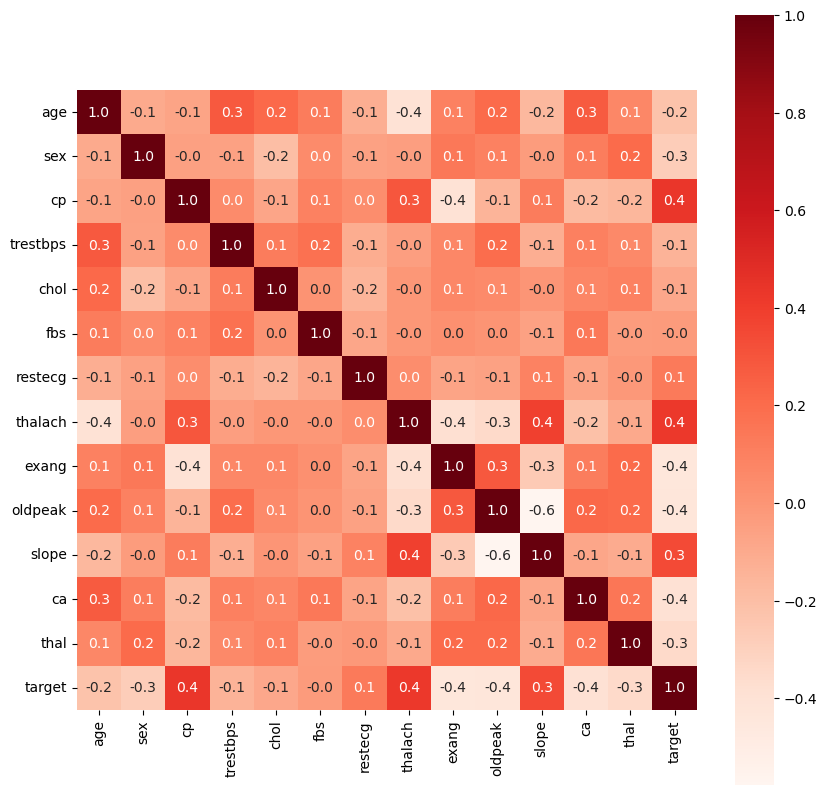

In [8]:
# trying to find a correlation between the features
correlation = heartData.corr()

plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':10}, cmap = 'Reds')

# Data Splitting

In [9]:
X = heartData.drop(['target'], axis = 1)
Y = heartData['target']

print(X)
print(Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

# Data Standardization

In [10]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [11]:
standardizedData = scaler.transform(X)
print(standardizedData)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [12]:
X = standardizedData 

#we changed the value of X as only X needed to be standardized

print(X)
print(Y)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


# Train-Test Data Splitting

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 1)

print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(303, 13) (272, 13) (31, 13)
(303,) (272,) (31,)


# Model Training (Logistic Regression)

In [17]:
classifier_1 = LogisticRegression()

In [19]:
#training the model
classifier_1.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation (Logistic Regression)

In [23]:
trainPrediction_1 = classifier_1.predict(X_train)
trainAccuracy_1 = accuracy_score(trainPrediction_1, Y_train)
print(trainAccuracy_1)

0.8492647058823529


In [24]:
testPrediction_1 = classifier_1.predict(X_test)
testAccuracy_1 = accuracy_score(testPrediction_1, Y_test)
print(testAccuracy_1)

0.8709677419354839


# Model Training (SVM)

In [25]:
classifier_2 = svm.SVC(kernel = 'linear')

In [26]:
classifier_2.fit(X_train, Y_train)

SVC(kernel='linear')

# Model Evaluation(SVM)

In [28]:
trainPrediction_2 = classifier_2.predict(X_train)
trainAccuracy_2 = accuracy_score(trainPrediction_2, Y_train)
print(trainAccuracy_2)

0.8492647058823529


In [29]:
testPrediction_2 = classifier_2.predict(X_test)
testAccuracy_2 = accuracy_score(testPrediction_2, Y_test)
print(testAccuracy_2)

0.9032258064516129


# Final Evaluation

In [ ]:
# as we can see SVM produces better results so we use it!!
# i.e we use Classifier_2

# Prediction Model

In [32]:
inputData = (52,1,2,172,199,1,1,162,0,0.5,2,0,3)

# changing the inputData to a numpy array

inputDataArr =  np.asarray(inputData)

# reshape the numpy array as we are predicting for one instance
inputDataArrReshape = inputDataArr.reshape(1,-1)

prediction = classifier_2.predict(inputDataArrReshape)

In [33]:
if prediction == 1:
    print("The Data suggets that the person has \"No Heart Disease\"")
elif prediction == 0:
    print("The Data suggest that the person has \"Heart Disease\"")

The Data suggest that the person has "Heart Disease"
